In [50]:
# importing respective panda modules which will be used for analysis
import numpy as np
import pandas as pd

# Utility Functions
### Convert string to lower case letters

In [51]:
# A convert_to_lower function which will conver string to its lower letter equivalent
convert_to_lower=lambda x: str(x).lower()

### splits on pipe and return the first item

In [52]:
splitter_on_pipe_return_first=lambda x: str(x).split('|')[0]

## Business Constraints

     * Spark Funds investment range is 5 million to 15 million USD
     * In case of mulitple category_list separated by | the first one will be considered as primary sector

## DATA Understanding

### permalink and company_permalink are used as unique identification key in companies and rounds2 dataset

### Reading data files with encoding "palmos"

In [53]:
# Reading companies.txt file into dataframe companies
companies = pd.read_csv("companies.txt", sep="\t", encoding = "palmos")

# Reading rounds2.csv file into dataframe rounds2
rounds2=pd.read_csv('rounds2.csv',encoding="palmos")

### Downloading English speaking countries PDF

In [54]:
import requests
url='http://www.emmir.org/fileadmin/user_upload/admission/Countries_where_English_is_an_official_language.pdf'
r = requests.get(url)  
with open("Countries_where_English_is_an_official_language.pdf", 'wb') as f:
    f.write(r.content)

### Reading pdf to build a list of countries

In [55]:
import PyPDF2
import re


# reading the pdf file
pdf_object = open('Countries_where_English_is_an_official_language.pdf', 'rb')
pdf_reader = PyPDF2.PdfFileReader(pdf_object)

# get a certain page's text
page_object = pdf_reader.getPage(0)
# Extract text from the page_object
pdf_text=page_object.extractText()
pdf_filter_text=['ListofcountrieswhereEnglishisanofficiallanguage','Africa','Asia','Americas','Australia/Oceania','Europe','\n']
for r in pdf_filter_text:
    pdf_text=pdf_text.replace(r,'')
lst_2_more_word_countries={'SierraLeone':'Sierra leone','SouthAfrica':'South africa','SouthSudan':'South sudan',
                           'FederatedStatesofMicronesia':'Federated states of micronesia','MarshallIslands':'Marshall islands'
                          ,'NewZealand':'New zealand','PapuaNewGuinea':'Papua new guinea','SolomonIslands':'Solomon islands',
                           'UnitedKingdom':'United kingdom','AntiguaandBarbuda':'Antigua and barbuda','TheBahamas':'The bahamas',
                          'SaintKittsandNevis':'Saint kitts and nevis','SaintLucia':'Saint lucia',
                           'SaintVincentandtheGrenadines':'Saint vincent and the grenadines','TrinidadandTobago':'Trinidad and tobago',
                          'UnitedStates':'United states'}
for k,v in lst_2_more_word_countries.items():
    pdf_text=pdf_text.replace(k,v)

english_speaking_countries=re.findall('[A-Z][^A-Z]*', pdf_text)
english_speaking_countries=list(map(convert_to_lower,english_speaking_countries))

## Inspecting the dataframe by structure and value

In [56]:
print("Number of null values in unique id i.e. permalink of companies ",companies.isnull().sum()['permalink'])

Number of null values in unique id i.e. permalink of companies  0


In [57]:
print("Number of null values in unique id i.e. permalink of companies ",rounds2.isnull().sum()['company_permalink'])

Number of null values in unique id i.e. permalink of companies  0


### Normalizing the case-sensitivity in companies and rounds2 dataframe

In [58]:
# Now we will normalize the values in dataframe companies and rounds2
companies['permalink']=companies['permalink'].apply(convert_to_lower)
rounds2['company_permalink']=rounds2['company_permalink'].apply(convert_to_lower)

### Number of unqiue companies in companies dataset

In [59]:
print("Number of unique companies in companies dataframe: ",len(companies.groupby('permalink')) )

Number of unique companies in companies dataframe:  66368


### Number of unique companies in rounds2 dataset

In [60]:
print("Number of unique companies in companies dataframe: ", len(rounds2['company_permalink'].unique()))


Number of unique companies in companies dataframe:  66368


### Is there any companies in rounds2 not in companies dataset

In [61]:
round2_only_comp=rounds2.loc[~rounds2['company_permalink'].isin(companies['permalink'])]
print("Number of companies in rounds2 not in companies dataset :",len(round2_only_comp))

Number of companies in rounds2 not in companies dataset : 0


### Dataset Identification

#### Unique Identification: permalink & company_permalink will be unique id in dataset companies and rounds2
#### Data Normalization: raised_amount_usd, funding_round_type, category_list & country_code are an important attribute for computation and can't be null

## DATA PREPARATION

### Merging dataframe companies and rounds2

In [62]:
#As the two dataset doesn't have column name in common
# We are renaming the column company_permalink to permalink of rounds2 dataframe
rounds2=rounds2.rename(index=str,columns={"company_permalink":"permalink"})
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 114949 entries, 0 to 114948
Data columns (total 6 columns):
permalink                  114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 6.1+ MB


### Total number of observation in merged dataframe

In [63]:
master_frame=pd.merge(companies,rounds2, how='inner',on='permalink')
print("Number of observation in master_frame: ",master_frame.shape)

Number of observation in master_frame:  (114949, 15)


### Data cleaning

In [64]:
print("\t\tmaster_frame \n",master_frame.isnull().sum())

		master_frame 
 permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64


#### As we can see we have null values country_code with 8678 , category_list with 3410 and raised_amount_usd with 19990

In [65]:
#cleaning country_code with null value 
master_frame=master_frame[~master_frame['country_code'].isnull()]

#cleaning rows having category_list as null
master_frame=master_frame[~master_frame['category_list'].isnull()]
#cleaning rows having raised_amount_usd as ul
master_frame=master_frame[~master_frame['raised_amount_usd'].isnull()]
master_frame.reset_index()
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                3251
category_list                  0
status                         0
country_code                   0
state_code                  1731
region                      1184
city                        1181
founded_at                 13369
funding_round_permalink        0
funding_round_type             0
funding_round_code         61753
funded_at                      0
raised_amount_usd              0
dtype: int64

In [66]:
#Revalidating the max value in master_frame
master_frame.describe()

,raised_amount_usd
count,8.852900e+04
mean,1.047385e+07
std,1.118118e+08
min,0.000000e+00
25%,3.705180e+05
50%,1.800000e+06
75%,7.100000e+06
max,2.127194e+10


In [67]:
fund_type=master_frame.groupby('funding_round_type')
fund_type.describe()

raised_amount_usd                                       \
                                  count          mean           std      min   
funding_round_type                                                             
angel                            4400.0  9.715739e+05  7.710904e+06      0.0   
convertible_note                 1320.0  1.337187e+06  5.994593e+06      0.0   
debt_financing                   6506.0  1.716765e+07  2.840317e+08      0.0   
equity_crowdfunding              1128.0  5.098980e+05  1.750626e+06      0.0   
grant                            1939.0  4.512698e+06  2.664946e+07      0.0   
non_equity_assistance              60.0  4.807534e+05  1.948883e+06      0.0   
post_ipo_debt                     151.0  1.694518e+08  6.044080e+08  70000.0   
post_ipo_equity                   598.0  6.607706e+07  2.075119e+08     77.0   
private_equity                   1820.0  7.393849e+07  2.017765e+08      0.0   
product_crowdfunding              330.0  1.353227e+06  4.333771e+06      0.0   
secondary_market                   28.0  8.443853e+07  1.439256e+08   2323.0   
seed                            21095.0  7.477937e+05  2.288318e+06      0.0   
undisclosed                      1345.0  1.589166e+07  1.653383e+08      0.0   
venture                         47809.0  1.172422e+07  8.821571e+07      0.0   

                                                                          
                              25%         50%          75%           max  
funding_round_type                                                        
angel                   152756.50    414906.0   1000000.00  4.945120e+08  
convertible_note         83863.75    300000.0   1000000.00  1.500000e+08  
debt_financing          337625.00   1096653.0   4000000.00  2.127194e+10  
equity_crowdfunding       5000.00     85000.0    340105.75  2.740000e+07  
grant                    50579.00    225000.0   1715427.00  7.500000e+08  
non_equity_assistance    29250.00     60000.0    189150.50  1.500000e+07  
post_ipo_debt          4000000.00  19900000.0  60000000.00  5.800000e+09  
post_ipo_equity        3855282.00  12262852.5  39442072.75  3.200000e+09  
private_equity         5000000.00  20000000.0  75762572.00  4.745460e+09  
product_crowdfunding     50828.75    211500.0    795762.25  5.200000e+07  
secondary_market       5675000.00  45850000.0  88750000.00  6.806116e+08  
seed                     68816.50    300000.0   1000000.00  2.000000e+08  
undisclosed             253000.00   1100000.0   4672932.00  4.630000e+09  
venture                1600000.00   5000000.0  12000000.00  1.760000e+10

In [68]:
print("Average Funding amount for venture type       : ",master_frame.loc[master_frame.funding_round_type=='venture'].raised_amount_usd.mean())
print("Average Funding amount for angel type         : ",master_frame.loc[master_frame.funding_round_type=='angel'].raised_amount_usd.mean())
print("Average Funding amount for seed type          : ",master_frame.loc[master_frame.funding_round_type=='seed'].raised_amount_usd.mean())
print("Average Funding amount for private equity type: ",master_frame.loc[master_frame.funding_round_type=='private_equity'].raised_amount_usd.mean())

Average Funding amount for venture type       :  11724222.690204773
Average Funding amount for angel type         :  971573.8911363636
Average Funding amount for seed type          :  747793.6824840009
Average Funding amount for private equity type:  73938486.27527472


#### As we have identified that funding type is venture: filtering dataframe with that dataset only

In [69]:
# Creating a backup of master_frame as master_frame_root
master_frame_root=master_frame.copy()

In [70]:
## removing records of investment type not belonging to venture type
master_frame=master_frame.loc[master_frame['funding_round_type'].isin(['venture']), :]

#Validating that we only left with one type of funding
master_frame.groupby('funding_round_type').sum()

,raised_amount_usd
funding_round_type,
venture,5.605234e+11


### Checkpoint 3

In [71]:
group_by_country=master_frame.groupby('country_code')
investment_sorted_list=pd.DataFrame(group_by_country.raised_amount_usd.sum().sort_values(ascending = False))
investment_sorted_list=investment_sorted_list.reset_index()
top9=investment_sorted_list[0:9]
print("-"*100)
print("\t\tTOP 9 Countries received most investment")
print("-"*100)
print(top9)

----------------------------------------------------------------------------------------------------
		TOP 9 Countries received most investment
----------------------------------------------------------------------------------------------------
  country_code  raised_amount_usd
0          USA       4.200680e+11
1          CHN       3.933892e+10
2          GBR       2.007281e+10
3          IND       1.426151e+10
4          CAN       9.482218e+09
5          FRA       7.226851e+09
6          ISR       6.854350e+09
7          DEU       6.306922e+09
8          JPN       3.167647e+09


In [72]:
import pycountry
top3_english_speaking_countries=[]
for cc in top9['country_code']:
    country_name=pycountry.countries.get(alpha_3=cc).name
    try:
        english_speaking_countries.index(country_name.lower())
        if len(top3_english_speaking_countries)<3:
            top3_english_speaking_countries.append([cc,country_name])
        else:
            break
    except ValueError:
        continue
print("-"*100)
print("\t\tTOP 3 English Speaking Countries")
print("-"*100)
print(top3_english_speaking_countries)


----------------------------------------------------------------------------------------------------
		TOP 3 English Speaking Countries
----------------------------------------------------------------------------------------------------
[['USA', 'United States'], ['GBR', 'United Kingdom'], ['IND', 'India']]


### Checkpoint 4

#### Assumption
    *‘Other’ is one of the eight main sectors; 
    * Consider the category 'Blanks' as a missing value.

#### Applying business constraint of considering 1st element before pipe under category_list as primary_sector

In [73]:
#splitter_on_pipe_return_first is a utility function defined at start
master_frame['primary_sector']=(master_frame['category_list'].apply(splitter_on_pipe_return_first)).copy()
master_frame.head()

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy [ipykernel_launcher.py:2]


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,Curated Web
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Biotechnology
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,Analytics
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,Analytics


In [74]:
# Reading mapping.csv file 
# mapping.csc file contains the mapping of sector to there main sector.
# This dataset will be merged with master_frame to have mapping of respective primary_sector to its main sector
mapping=pd.read_csv('mapping.csv',encoding="palmos")

In [75]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [76]:
# Inspecting null values in mapping dataframe
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [77]:
#Cleaning null values in category_list of mapping dataframe
mapping=mapping[~(mapping['category_list'].isnull())]
# Revalidating null values in mapping dataframe
mapping.isnull().sum()
mapping.reset_index()
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [78]:
## As we don't want to add all the columns of mapping to master_frame but only main_sector with correct value
## We are going to change the order of row and column on mapping dataframe and store it in row_col_inverse
row_col_inverse = mapping.set_index('category_list').unstack().reset_index()
row_col_inverse

,level_0,category_list,0
0,Automotive & Sports,3D,0
1,Automotive & Sports,3D Printing,0
2,Automotive & Sports,3D Technology,0
3,Automotive & Sports,Accounting,0
4,Automotive & Sports,Active Lifestyle,0
5,Automotive & Sports,Ad Targeting,0
6,Automotive & Sports,Advanced Materials,0
7,Automotive & Sports,Adventure Travel,1
8,Automotive & Sports,Advertising,0
9,Automotive & Sports,Advertising Exchanges,0


In [79]:
#renaming columns in row_col_inverse to label level_0 as main_sector and 0 as value and also category_list as primary_sector
row_col_inverse=row_col_inverse.rename(columns= {'level_0': 'main_sector',0 : 'value','category_list':'primary_sector'})
#removing all rows where value is zero which means for that category list the respevtive value of main_sector is not correct
row_col_inverse = row_col_inverse[row_col_inverse['value'] != 0]

#mapping back row_col_inverse to mapping
mapping=row_col_inverse.copy()
mapping.reset_index()
mapping.head()

,main_sector,primary_sector,value
7,Automotive & Sports,Adventure Travel,1
13,Automotive & Sports,Aerospace,1
44,Automotive & Sports,Auto,1
45,Automotive & Sports,Automated Kiosk,1
46,Automotive & Sports,Automotive,1


### There is an erroneous data in mapping dataset where 'na' is replace by '0'.
    * example: Predictive A0lytics, Promotio0l,Property Ma0gement

In [80]:
# Correcting dataset replace '0' by 'na'
mapping.category_list=mapping.primary_sector.apply(lambda x: str(x).replace('0','na'))

### Merging mapping to master_frame to make a mapping of primary_sector to respective main_sector

In [81]:
master_frame=pd.merge(master_frame,row_col_inverse,on='primary_sector',how='inner')
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,main_sector,value
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media,Entertainment,1
1,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,Media,Entertainment,1
2,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,Media,Entertainment,1
3,/organization/90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,Media,Entertainment,1
4,/organization/all-def-digital,All Def Digital,http://alldefdigital.com,Media,operating,USA,CA,Los Angeles,Los Angeles,NaN,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,Media,Entertainment,1


### Checkpoint 5

In [82]:
#Applying business constraint of filtering data between range of 5 million to 15 million USD
print(master_frame.describe())
master_frame=master_frame[(master_frame.raised_amount_usd>=5000000) & (master_frame.raised_amount_usd<=15000000)].copy()
print(master_frame.describe())

       raised_amount_usd    value
count       4.469200e+04  44692.0
mean        1.172898e+07      1.0
std         9.096335e+07      0.0
min         0.000000e+00      1.0
25%         1.600000e+06      1.0
50%         5.000000e+06      1.0
75%         1.200000e+07      1.0
max         1.760000e+10      1.0
       raised_amount_usd    value
count       1.461300e+04  14613.0
mean        8.894127e+06      1.0
std         3.057812e+06      0.0
min         5.000000e+06      1.0
25%         6.000000e+06      1.0
50%         8.300000e+06      1.0
75%         1.100000e+07      1.0
max         1.500000e+07      1.0


#### Creating a dataframe for country USA

In [83]:
D1=master_frame[(master_frame.country_code=='USA') &(master_frame.raised_amount_usd>=5000000) & (master_frame.raised_amount_usd<=15000000)].copy()

In [84]:
#checking data integrity in dataframe D1
D1.isnull().any()
print(round(100*(D1.isnull().sum()/len(D1.index)), 2))
D1=D1[(D1['main_sector']!='Blanks')]

# Grouping by main_sector
grouppedD1=D1.groupby('main_sector')
grouppedD1['main_sector'].count()
# applying total_investment_count on groupped by main_sector column and setting value of sector_count
D1['number_of_investment']=grouppedD1['main_sector'].transform('count')
D1['total_investment_value']=grouppedD1['raised_amount_usd'].transform('sum')


permalink                   0.00
name                        0.00
homepage_url                4.88
category_list               0.00
status                      0.00
country_code                0.00
state_code                  0.02
region                      0.08
city                        0.08
founded_at                 14.24
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         29.20
funded_at                   0.00
raised_amount_usd           0.00
primary_sector              0.00
main_sector                 0.00
value                       0.00
dtype: float64


#### Creating a dataframe for country GBR

In [85]:
D2=master_frame[(master_frame.country_code=='GBR') &(master_frame.raised_amount_usd>=5000000) & (master_frame.raised_amount_usd<=15000000)].copy()
D2=D2[(D2['main_sector']!='Blanks')]
grouppedD2=D2.groupby('main_sector')
D2.loc[:,'number_of_investment']=grouppedD2['main_sector'].transform('count')
D2.loc[:,'total_investment_value']=grouppedD2['raised_amount_usd'].transform('sum')

#### Creating a dataframe for country IND

In [86]:
D3=master_frame[(master_frame.country_code=='IND') &(master_frame.raised_amount_usd>=5000000) & (master_frame.raised_amount_usd<=15000000)].copy()
D3=D3[(D3['main_sector']!='Blanks')]
grouppedD3=D3.groupby('main_sector')
D3['number_of_investment']=grouppedD3['main_sector'].transform('count')
D3['total_investment_value']=grouppedD3['raised_amount_usd'].transform('sum')

In [87]:
print(grouppedD1['main_sector'].count())
print(grouppedD2['main_sector'].count())
print(grouppedD3['main_sector'].count())

main_sector
Automotive & Sports                         167
Cleantech / Semiconductors                 2297
Entertainment                               580
Health                                      908
Manufacturing                               799
News, Search and Messaging                 1563
Others                                     2923
Social, Finance, Analytics, Advertising    1912
Name: main_sector, dtype: int64
main_sector
Automotive & Sports                         16
Cleantech / Semiconductors                 127
Entertainment                               54
Health                                      24
Manufacturing                               42
News, Search and Messaging                  73
Others                                     143
Social, Finance, Analytics, Advertising     98
Name: main_sector, dtype: int64
main_sector
Automotive & Sports                         13
Cleantech / Semiconductors                  20
Entertainment                               33

In [88]:
print("Total number of investment made in USA: ",D1['main_sector'].count())
print("Total number of investment made in GBR: ",D2['main_sector'].count())
print("Total number of investment made in IND: ",D3['main_sector'].count())

Total number of investment made in USA:  11149
Total number of investment made in GBR:  577
Total number of investment made in IND:  299


##### Checkpoint 5.1.2

In [89]:
print("Total amount invested in USD in USA: ",D1['raised_amount_usd'].sum())
print("Total amount invested in USD in GBR: ",D2['raised_amount_usd'].sum())
print("Total amount invested in USD in IND: ",D3['raised_amount_usd'].sum())

Total amount invested in USD in USA:  99661524549.0
Total amount invested in USD in GBR:  5028704358.0
Total amount invested in USD in IND:  2683537552.0


##### Checkpoint 5.1 (3,4,5,6,7 & 8)

In [90]:
grouppedD3['raised_amount_usd'].count().sort_values(ascending=False)[0:3]

main_sector
Others                        109
News, Search and Messaging     52
Entertainment                  33
Name: raised_amount_usd, dtype: int64

In [91]:
print("USA: Top 3 sectors by number of investment: ",grouppedD1['raised_amount_usd'].count().sort_values(ascending=False)[0:3])
print("\nGBR: Top 3 sectors by number of investment: ",grouppedD2['raised_amount_usd'].count().sort_values(ascending=False)[0:3])
print("\nIND: Top 3 sectors by number of investment: ",grouppedD3['raised_amount_usd'].count().sort_values(ascending=False)[0:3])

USA: Top 3 sectors by number of investment:  main_sector
Others                                     2923
Cleantech / Semiconductors                 2297
Social, Finance, Analytics, Advertising    1912
Name: raised_amount_usd, dtype: int64

GBR: Top 3 sectors by number of investment:  main_sector
Others                                     143
Cleantech / Semiconductors                 127
Social, Finance, Analytics, Advertising     98
Name: raised_amount_usd, dtype: int64

IND: Top 3 sectors by number of investment:  main_sector
Others                        109
News, Search and Messaging     52
Entertainment                  33
Name: raised_amount_usd, dtype: int64


#### Checkpoint 5.9

In [92]:
print("USA, sector Others Highest Inv. receiving Company:- ", D1[(D1.main_sector=='Others')].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False)[0:1].index.values[0])
print("GBR, sector Others Highest Inv. receiving Company:- ", D2[(D2.main_sector=='Others')].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False)[0:1].index.values[0])
print("IND, sector Others Highest Inv. receiving Company:- ", D3[(D3.main_sector=='Others')].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False)[0:1].index.values[0])

USA, sector Others Highest Inv. receiving Company:-  Virtustream
GBR, sector Others Highest Inv. receiving Company:-  Electric Cloud
IND, sector Others Highest Inv. receiving Company:-  FirstCry.com


#### Checkpoint 5.10

In [93]:
print("USA, 2nd best sector Highest Inv. receiving Company:- ", D1[(D1.main_sector=='Cleantech / Semiconductors')].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False)[0:1].index.values[0])
print("GBR, 2nd best sector Highest Inv. receiving Company:- ", D2[(D2.main_sector=='Cleantech / Semiconductors')].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False)[0:1].index.values[0])
print("IND, 2nd best sector Highest Inv. receiving Company:- ", D3[(D3.main_sector=='News, Search and Messaging')].groupby('name')['raised_amount_usd'].sum().sort_values(ascending=False)[0:1].index.values[0])

USA, 2nd best sector Highest Inv. receiving Company:-  Biodesix
GBR, 2nd best sector Highest Inv. receiving Company:-  EUSA Pharma
IND, 2nd best sector Highest Inv. receiving Company:-  GupShup


### Checkpoint 6

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Checkpoint 6.1

  funding_round_type  total_investment  average_investment  total_investment%
0     private_equity      3.722570e+09        9.260123e+06           2.564062
1               seed      1.233263e+09        6.594991e+06           0.849457
2            venture      1.402267e+11        8.891425e+06          96.586480


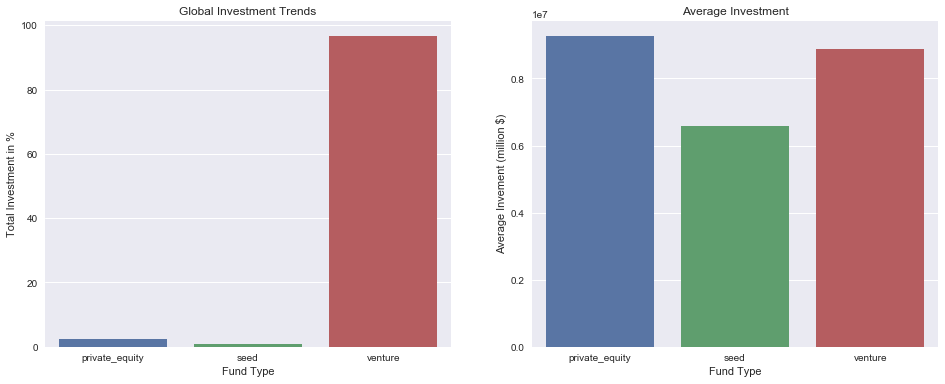

In [95]:
master_frame_root=master_frame_root[(master_frame_root.raised_amount_usd>=5000000) & (master_frame_root.raised_amount_usd<=15000000)].copy()
master_frame_root=master_frame_root.loc[master_frame_root['funding_round_type'].isin(['venture','seed','private_equity']), :]

plot61_df=master_frame_root.pivot_table(values = ['raised_amount_usd'], index = 'funding_round_type', aggfunc = [np.sum,np.mean])
plot61_df.columns=['_'.join(col) for col in plot61_df.columns]
plot61_df.rename(columns={'sum_raised_amount_usd':'total_investment','mean_raised_amount_usd':'average_investment'},inplace=True)

total_investments=plot61_df['total_investment'].sum()


plot61_df['total_investment%']=plot61_df['total_investment'].apply(lambda x: (x/float(total_investments)*100))
plot61_df.reset_index(inplace=True)
print(plot61_df.head())
plt.figure(figsize=(16, 6))

# subplot 1: Total Investment Fraction
plt.subplot(1, 2, 1)
sns.barplot(x='funding_round_type', y='total_investment%', data=plot61_df)
plt.title("Global Investment Trends")
plt.xlabel('Fund Type')
plt.ylabel('Total Investment in %')

# subplot 2: 
plt.subplot(1, 2, 2)

sns.barplot(x='funding_round_type', y='average_investment', data=plot61_df)
plt.title("Average Investment")
plt.xlabel('Fund Type')
plt.ylabel('Average Invement (million $)')
plt.show()

#### Checkpoint 6.2

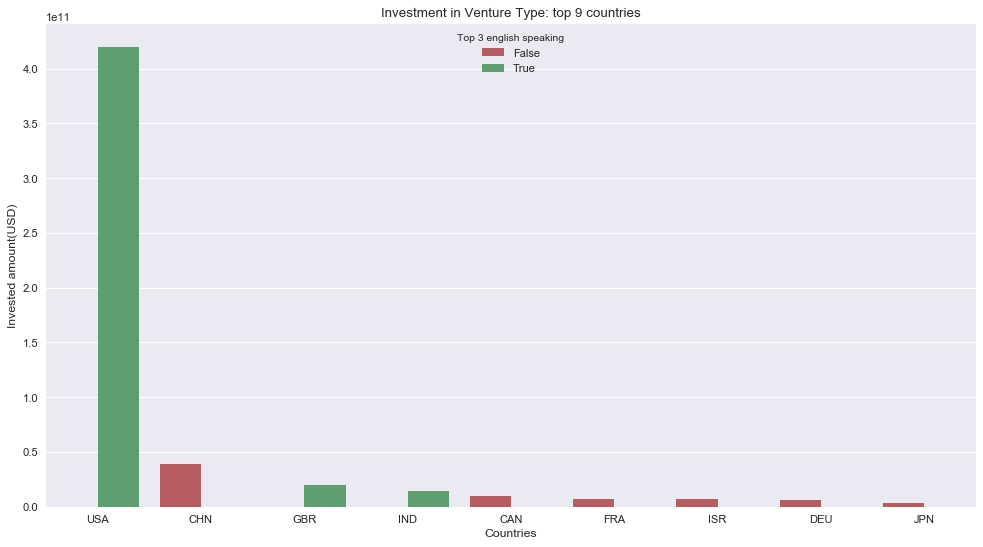

In [96]:
#A plot showing the top 9 countries against the total amount of investments of funding type FT. 
#This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

english_country_code_list=[]
for r in top3_english_speaking_countries:
    english_country_code_list.append(r[0])

top9_graphdf=top9.copy()
top9_graphdf['Top 3 english speaking']=top9_graphdf['country_code'].apply(lambda x: x in english_country_code_list)
#print(top9_graphdf.head())
plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
palette ={True:"C1",False:"C2"}
plt.title('Investment in Venture Type: top 9 countries')
graphobj=sns.barplot(x="country_code",y='raised_amount_usd', data=top9_graphdf,hue='Top 3 english speaking',palette=palette)
graphobj.set(xlabel='Countries', ylabel='Invested amount(USD)')
plt.show()

#### Checkpoint 6.3

In [97]:
#A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart 
#(for the chosen investment type FT).

country1_frame=D1.groupby(['country_code','main_sector'])['raised_amount_usd'].count().sort_values(ascending=False)[0:3].to_frame().reset_index()
country2_frame=D2.groupby(['country_code','main_sector'])['raised_amount_usd'].count().sort_values(ascending=False)[0:3].to_frame().reset_index()
country3_frame=D3.groupby(['country_code','main_sector'])['raised_amount_usd'].count().sort_values(ascending=False)[0:3].to_frame().reset_index()

plot_frame=country1_frame.append(country2_frame)
plot_frame=plot_frame.append(country3_frame)
plot_frame.reset_index()
plot_frame.rename(columns={'raised_amount_usd':'number_of_investment'},inplace=True)
plot_frame

,country_code,main_sector,number_of_investment
0,USA,Others,2923
1,USA,Cleantech / Semiconductors,2297
2,USA,"Social, Finance, Analytics, Advertising",1912
0,GBR,Others,143
1,GBR,Cleantech / Semiconductors,127
2,GBR,"Social, Finance, Analytics, Advertising",98
0,IND,Others,109
1,IND,"News, Search and Messaging",52
2,IND,Entertainment,33


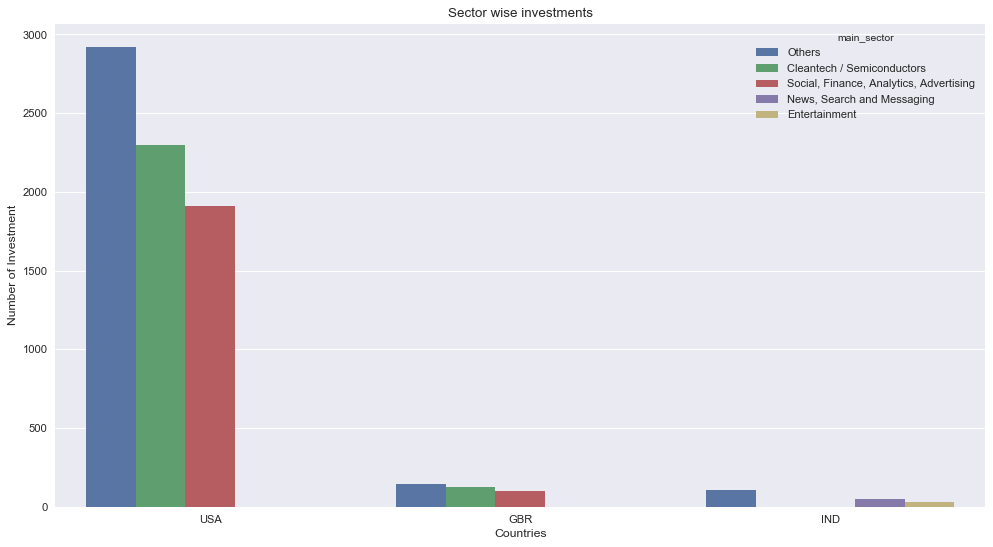

In [98]:
plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')
# specify hue="categorical_variable"
plt.title('Sector wise investments')
graphobj=sns.barplot(x='country_code', y='number_of_investment', hue='main_sector', data=plot_frame)
graphobj.set(xlabel='Countries',ylabel='Number of Investment')
plt.show()